О наборе данных
Специалисты по данным в BigMart собрали данные о продажах за 2013 год по 1559 продуктам в 10 магазинах в разных городах. Также были определены некоторые характеристики каждого продукта и магазина. Цель состоит в том, чтобы построить прогнозную модель и выяснить продажи каждого продукта в конкретном магазине.

Мы можем разделить этот процесс на четыре уровня: уровень продукта, уровень магазина, уровень клиента и макроуровень.

Гипотезы на уровне магазина:

1. Тип города: Магазины, расположенные в городских или городах первого уровня, должны иметь более высокие продажи из-за более высокого уровня доходов населения.
2. Плотность населения: Магазины, расположенные в густонаселенных районах, должны иметь более высокие продажи из-за большего спроса.
3. Вместимость магазина: Большие по размеру магазины должны иметь более высокие продажи, так как они работают как универсальные магазины, и люди предпочитают покупать все в одном месте.
4. Конкуренты: Магазины, имеющие поблизости похожие заведения, должны иметь меньше продаж из-за большей конкуренции.
5. Маркетинг: Магазины с хорошим маркетинговым отделом должны иметь более высокие продажи, так как смогут привлекать клиентов правильными предложениями и рекламой.
6. Расположение: Магазины, расположенные в популярных торговых районах, должны иметь более высокие продажи благодаря лучшему доступу к клиентам.
7. Поведение клиентов: Магазины, хранящие правильный набор продуктов для удовлетворения местных потребностей клиентов, будут иметь более высокие продажи.
8. Атмосфера: Ожидается, что магазины, которые хорошо обслуживаются и управляются вежливыми и скромными людьми, будут иметь более высокую посещаемость и, следовательно, более высокие продажи.

Гипотезы на уровне продукта:

1. Бренд: Фирменные продукты должны иметь более высокие продажи из-за большего доверия у клиентов.
2. Упаковка: Продукты с хорошей упаковкой могут привлекать клиентов и продаваться лучше.
3. Полезность: Товары ежедневного использования должны иметь более высокую тенденцию к продаже по сравнению с товарами специального назначения.
4. Площадь выкладки: Продукты, которым выделены большие полки в магазине, вероятнее всего, первыми привлекут внимание и будут продаваться лучше.
5. Видимость в магазине: Расположение продукта в магазине влияет на продажи. Те, что находятся прямо у входа, первыми привлекут внимание покупателя, в отличие от тех, что находятся в глубине.
6. Реклама: Лучшая реклама продуктов в магазине должна в большинстве случаев приводить к более высоким продажам.
7. Промо-акции: Продукты, сопровождаемые привлекательными предложениями и скидками, будут продаваться лучше.

# Описание характеристик:

# Числовые характеристики:

Item_Weight: Вес товара или товара.

Item_Visibility: Процент от общей площади отображения всех товаров в магазине, отведенный под конкретный товар.

Item_MRP: Максимальная розничная цена (цена по прейскуранту) товара

Outlet_Establishment_Year: Год основания магазина.

Item_Outlet_Sales: Продажи товара в конкретном магазине. Это целевая переменная для прогнозирования.

# Категорийные характеристики:

Item_Identifier: Уникальный идентификатор товара (позже мы хотели бы удалить этот столбец)

Item_Fat_Content: Является ли товар низкокалорийным, жирным или нет

Item_Type: Категория, к которой относится товар.

Outlet_Identifier: Уникальный идентификатор магазина

Outlet_Size: Размер магазина с точки зрения занимаемой площади.

Outlet_Location_Type: Тип города, в котором расположен магазин.

Outlet_Type: Является ли аутлет просто продуктовым магазином или своего рода супермаркетом.

------------------------------------------------------------

In [1]:
# Импорт необходимых библиотек
import pandas as pd  # для работы с данными в формате DataFrame
import numpy as np   # для численных вычислений
import matplotlib.pyplot as plt  # для создания графиков
import seaborn as sns  # для улучшенной визуализации
from sklearn.model_selection import train_test_split, KFold  # для разделения данных и кросс-валидации
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # метрики качества
from xgboost import XGBRegressor  # градиентный бустинг для регрессии
from sklearn.preprocessing import StandardScaler  # для масштабирования признаков
import warnings

In [2]:
# Отключаем предупреждения для чистоты вывода
warnings.filterwarnings('ignore')

In [3]:
# Функция для анализа структуры и статистик датасета
def analyze_dataset(df, name="Dataset"):
    """
    Выводит основную информацию о датасете:
    - размерность (количество строк и столбцов)
    - статистические характеристики числовых признаков
    - типы данных всех признаков
    """
    print(f"\n{name} Analysis:")
    print(f"Shape: {df.shape}")
    print("\nFeature Statistics:")
    print(df.describe())
    print("\nFeature Types:")
    print(df.dtypes)

In [4]:
# Функция для визуализации корреляций между признаками
def plot_correlations(df, target_col):
    """
    Создает тепловую карту корреляций и выводит корреляции с целевой переменной
    Args:
        df: DataFrame с данными
        target_col: название целевой переменной
    """
    plt.figure(figsize=(12, 8))
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Numeric Features')
    plt.tight_layout()
    plt.show()
    
    print("\nCorrelations with target variable:")
    correlations = df[numeric_cols].corr()[target_col].sort_values(ascending=False)
    print(correlations)

In [5]:
# Загрузка данных
train_data_original = pd.read_csv('Train.csv')
test_data_original = pd.read_csv('Test.csv')

# Создаем копии данных для обработки
train_data = train_data_original.copy()
test_data = test_data_original.copy()

In [6]:
print(f"Количество записей: {len(train_data)}")

Количество записей: 8523


In [7]:
# Анализ обучающего набора данных
analyze_dataset(train_data, "Training Data")


Training Data Analysis:
Shape: (8523, 12)

Feature Statistics:
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max     

In [8]:
# Функция для очистки и предобработки данных
def clean_data(df):
    """
    Выполняет предобработку данных:
    1. Унификация категорий в Item_Fat_Content
    2. Создание новых признаков
    3. Обработка пропущенных значений
    """
    # Унификация значений для содержания жира
    df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
        'low fat': 'Low Fat',
        'LF': 'Low Fat',
        'reg': 'Regular'
    })
    # Создание новых информативных признаков
    df['num_years'] = 2013 - df['Outlet_Establishment_Year']  # возраст магазина
    df['Item_MRP_Scaled'] = np.log1p(df['Item_MRP'])  # логарифм цены
    df['Item_Visibility_Scaled'] = np.log1p(df['Item_Visibility'])  # логарифм видимости
    
    # Заполнение пропущенных значений
    df['Item_Weight'] = df.groupby('Item_Type')['Item_Weight'].transform(
        lambda x: x.fillna(x.mean()))  # среднее значение веса по типу товара
    df['Outlet_Size'].fillna('Medium', inplace=True)  # заполнение размера магазина
    
    return df

In [9]:
# Применение очистки данных к обоим наборам
train_data = clean_data(train_data)
test_data = clean_data(test_data)

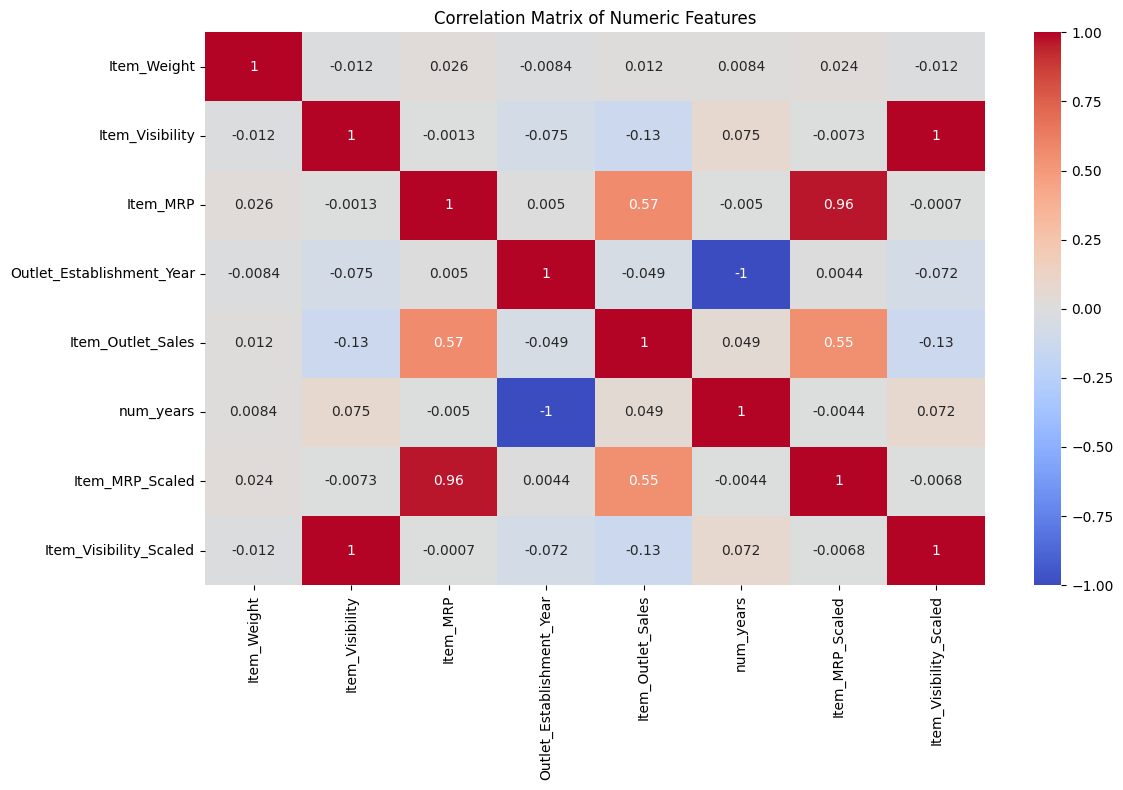


Correlations with target variable:
Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_MRP_Scaled              0.548716
num_years                    0.049135
Item_Weight                  0.012088
Outlet_Establishment_Year   -0.049135
Item_Visibility_Scaled      -0.125600
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


In [10]:
# Визуализация корреляций
plot_correlations(train_data, 'Item_Outlet_Sales')

In [11]:
# Визуализация ключевых зависимостей в данных
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Sales by Outlet Type')

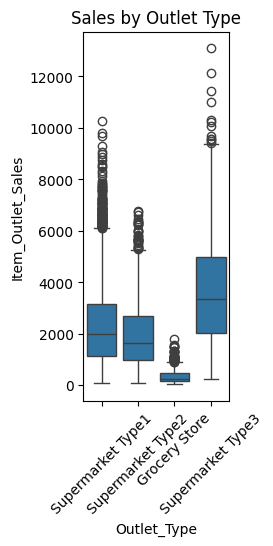

In [12]:
# График 1: Продажи по типам магазинов
plt.subplot(1, 3, 1)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_data)
plt.xticks(rotation=45)
plt.title('Sales by Outlet Type')

Этот график (box plot или "ящик с усами") показывает распределение продаж в зависимости от типа торговой точки (Outlet_Type).

1. Типы торговых точек:
  - Supermarket Type1
  - Supermarket Type2
  - Grocery Store
  - Supermarket Type3

2. Сравнение продаж:
  - Supermarket Type3 показывает самые высокие продажи:
   * Медиана около 3500 единиц
   * Большой разброс значений (длинный "ящик")
   * Много выбросов в верхней части (точки выше "усов")

  - Grocery Store показывает самые низкие продажи:
   * Медиана около 500 единиц
   * Маленький разброс значений (компактный "ящик")
   * Несколько выбросов выше

  - Supermarket Type1 и Type2 показывают средние показатели:
   * Медианы около 1500-2000 единиц
   * Умеренный разброс значений
   * Множество выбросов в верхней части

3. Общие выводы:
  - Наблюдается чёткая иерархия в объёмах продаж между разными типами магазинов
  - Супермаркеты Type3 наиболее успешны по продажам
  - Продуктовые магазины (Grocery Store) значительно уступают по продажам супермаркетам
  - Во всех типах магазинов есть выбросы, показывающие случаи очень высоких продаж

Эта визуализация помогает понять, как тип магазина влияет на объём продаж, и может быть полезна для стратегического планирования и оптимизации сети магазинов.

Text(0.5, 1.0, 'Sales vs MRP')

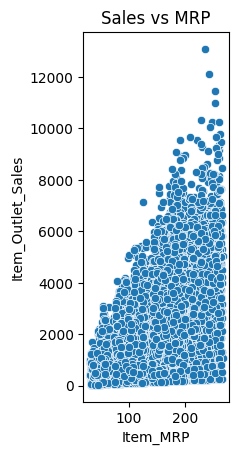

In [13]:
# График 2: Зависимость продаж от цены
plt.subplot(1, 3, 2)
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train_data)
plt.title('Sales vs MRP')

Этот график показывает зависимость между продажами (Item_Outlet_Sales) и максимальной розничной ценой товара (MRP - Maximum Retail Price)

1. Общий тренд:
  - Наблюдается явная положительная корреляция: чем выше MRP товара, тем выше продажи
  - Зависимость имеет нелинейный характер, похожий на экспоненциальный рост

2. Распределение точек:
  - В нижней части графика (низкие MRP) точки располагаются более плотно
  - По мере увеличения MRP разброс продаж становится больше
  - Максимальная концентрация точек наблюдается в диапазоне MRP от 50 до 150

3. Особенности:
  - Присутствуют несколько выбросов в верхней части графика (продажи выше 10000)
  - При высоких значениях MRP (200+) наблюдается больший разброс в продажах
  - Минимальные продажи остаются примерно на одном уровне независимо от MRP

4. Выводы:
  - Цена товара является важным фактором, влияющим на объем продаж
  - Более дорогие товары в целом приносят больше выручки
  - Вариативность продаж увеличивается с ростом цены
  - Возможно, на высокие продажи дорогих товаров влияют дополнительные факторы (например, тип магазина или категория товара)

Этот график может быть полезен для ценообразования и прогнозирования продаж в зависимости от установленной цены товара.

Text(0.5, 1.0, 'Sales by Fat Content')

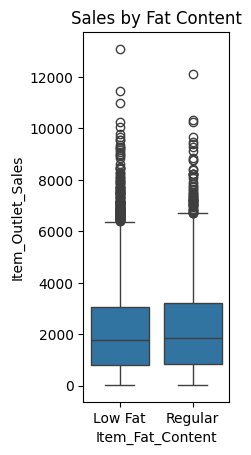

In [14]:
# График 3: Продажи по содержанию жира
plt.subplot(1, 3, 3)
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train_data)
plt.title('Sales by Fat Content')

Этот график (box plot) показывает распределение продаж в зависимости от содержания жира в продуктах (Low Fat vs Regular)

1. Основные категории:
  - Low Fat (низкое содержание жира)
  - Regular (обычное содержание жира)

2. Сравнительный анализ:
  - Медианы продаж практически идентичны для обеих категорий (около 1800-2000 единиц)
  - Размеры "ящиков" (межквартильный размах) очень похожи
  - Оба типа продуктов имеют схожее распределение выбросов (точки выше "усов")

3. Особенности:
  - Максимальные выбросы достигают примерно 12000-13000 единиц продаж
  - Нижняя граница продаж близка к нулю для обеих категорий
  - Большое количество выбросов указывает на наличие товаров с исключительно высокими продажами

4. Выводы:
  - Содержание жира в продукте практически не влияет на объём продаж
  - Покупатели, похоже, не отдают явного предпочтения низкожирным или обычным продуктам
  - Другие факторы (например, цена, тип магазина, категория товара) могут иметь более существенное влияние на продажи

Этот график показывает, что маркетинговая стратегия, основанная только на содержании жира в продуктах, может быть не очень эффективной, так как это не является определяющим фактором для объёма продаж.

In [15]:
# Вывод графиков
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [16]:
# Список категориальных признаков для кодирования
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 
                   'Outlet_Location_Type', 'Outlet_Type']

In [17]:
# Преобразование категориальных признаков в бинарные
train_data_encoded = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)

In [18]:
# Формирование списка признаков для модели
feat_cols = ['Item_Weight', 'Item_Visibility_Scaled', 'Item_MRP_Scaled', 
            'num_years'] + [col for col in train_data_encoded.columns 
            if col.startswith(tuple(categorical_cols))]

In [19]:
# Подготовка матрицы признаков и целевой переменной
X = train_data_encoded[feat_cols]
y = train_data_encoded['Item_Outlet_Sales']
X_test_actual = test_data_encoded[feat_cols]

In [20]:
# Масштабирование числовых признаков
scaler = StandardScaler()
numeric_cols = ['Item_Weight', 'Item_Visibility_Scaled', 'Item_MRP_Scaled', 'num_years']
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
X_test_actual[numeric_cols] = scaler.transform(X_test_actual[numeric_cols])

In [21]:
# Разделение данных на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Создание и настройка модели XGBoost с оптимальными параметрами
model = XGBRegressor(
    n_estimators=200,  # количество деревьев
    max_depth=4,       # максимальная глубина деревьев
    learning_rate=0.1, # скорость обучения
    subsample=0.8,     # доля случайных примеров для каждого дерева
    random_state=42    # фиксация случайности для воспроизводимости
)

In [23]:
# Настройка кросс-валидации для оценки качества модели
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-фолдовая кросс-валидация
cv_scores = []

In [24]:
# Выполнение кросс-валидации
for train_idx, val_idx in kf.split(X):
    # Разделение данных на обучающие и валидационные для текущего фолда
    X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
    
    # Обучение модели на текущем фолде
    model.fit(X_train_cv, y_train_cv)
    # Предсказание на валидационной части
    y_pred_cv = model.predict(X_val_cv)
    # Расчет RMSE для текущего фолда и сохранение
    cv_scores.append(np.sqrt(mean_squared_error(y_val_cv, y_pred_cv)))
    

In [25]:
# Вывод среднего значения RMSE по всем фолдам и его стандартного отклонения
print(f"\nCross-validation RMSE: {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores) * 2:.2f})")



Cross-validation RMSE: 1110.42 (+/- 66.32)


In [26]:
# Обучение финальной модели на всем тренировочном наборе
model.fit(X_train, y_train)

# Получение предсказаний на валидационном наборе
y_pred = model.predict(X_val)

In [27]:
# Расчет метрик качества модели
rmse = np.sqrt(mean_squared_error(y_val, y_pred))  # Корень из среднеквадратичной ошибки
mae = mean_absolute_error(y_val, y_pred)           # Средняя абсолютная ошибка
r2 = r2_score(y_val, y_pred)                      # Коэффициент детерминации

In [28]:
# Вывод метрик качества модели
print(f"\nМетрики оценки модели:")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")  # Показывает среднюю величину ошибки прогноза
print(f"MAE (Mean Absolute Error): {mae:.2f}")        # Показывает среднее абсолютное отклонение прогноза
print(f"R² (Coefficient of Determination): {r2:.4f}") # Показывает долю объясненной дисперсии


Метрики оценки модели:
RMSE (Root Mean Squared Error): 1055.41
MAE (Mean Absolute Error): 738.49
R² (Coefficient of Determination): 0.5902


In [29]:
# Анализ важности признаков
feature_importance = pd.DataFrame({
    'feature': feat_cols,                    # Названия признаков
    'importance': model.feature_importances_  # Важность каждого признака
})

In [30]:
# Сортировка признаков по убыванию важности
feature_importance = feature_importance.sort_values('importance', ascending=False)

In [31]:
# Визуализация важности признаков
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

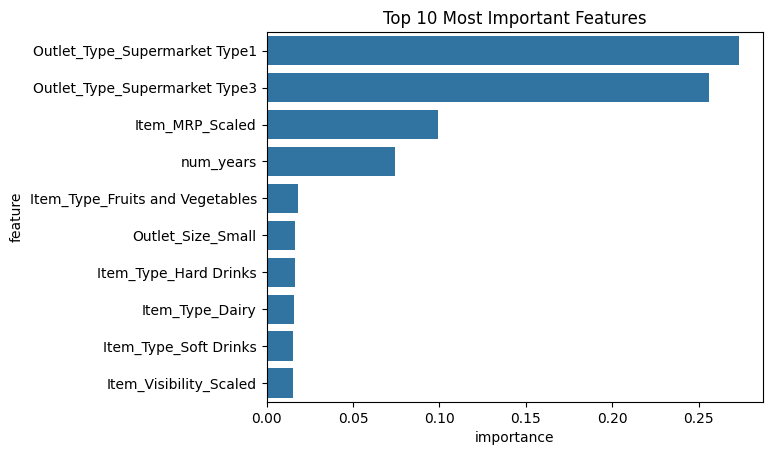

In [32]:
# Построение столбчатой диаграммы для топ-10 важнейших признаков
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()

Этот график показывает топ-10 наиболее важных признаков (feature importance) в модели. Давайте разберем их по порядку значимости:

1. Самые влиятельные факторы (значимость > 0.20):
   - Outlet_Type_Supermarket Type1 (~0.25)
   - Outlet_Type_Supermarket Type3 (~0.23)
   
2. Средняя значимость (0.05-0.15):
   - Item_MRP_Scaled (масштабированная цена) (~0.10)
   - num_years (возраст магазина) (~0.07)

3. Менее значимые факторы (< 0.05):
   - Item_Type_Fruits and Vegetables
   - Outlet_Size_Small
   - Item_Type_Hard Drinks
   - Item_Type_Dairy
   - Item_Type_Soft Drinks
   - Item_Visibility_Scaled

Ключевые выводы:
1. Тип супермаркета является наиболее важным фактором, влияющим на продажи
2. Цена товара (MRP) и возраст магазина также играют существенную роль
3. Категории товаров (фрукты/овощи, напитки, молочные продукты) имеют относительно небольшое влияние
4. Видимость товара (Item_Visibility_Scaled) оказывает наименьшее влияние среди топ-10 факторов

Эта информация может быть полезна для:
- Оптимизации бизнес-стратегии
- Принятия решений о развитии сети магазинов
- Ценовой политики
- Понимания, какие факторы менее важны для продаж

In [33]:
# Получение предсказаний для тестового набора
y_result = model.predict(X_test_actual)

In [34]:
# Формирование DataFrame с результатами
result = pd.DataFrame({
    'Item_Identifier': test_data['Item_Identifier'],         # ID товара
    'Outlet_Identifier': test_data['Outlet_Identifier'],     # ID магазина
    'Item_Outlet_Sales': y_result                           # Предсказанные продажи
})

In [35]:
# Сохранение результатов в CSV файл
result.to_csv('Bigmart_XGBoost_Results_Improved.csv', index=False)
print("\nРезультаты сохранены в файл Bigmart_XGBoost_Results_Improved.csv")


Результаты сохранены в файл Bigmart_XGBoost_Results_Improved.csv
